# Water Quality Analysis Project


##  Importing Required Libraries


In this section, we import all necessary Python libraries required for data manipulation, visualization, and machine learning.

In [32]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

##  Loading and Exploring the Dataset


We load the dataset containing water quality parameters and explore its structure.

### - Dataset Overview


Let's take an initial look at the dataset, including its shape (number of rows and columns).

In [33]:
# Loading the dataset
df = pd.read_csv("water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [34]:
# Checking the shape (dimensions) of the dataset
df.shape

(3276, 10)

In [35]:
# Displaying dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [36]:
# Counting the number of unique values in each column
df.nunique()

,0
ph,2785
Hardness,3276
Solids,3276
Chloramines,3276
Sulfate,2495
Conductivity,3276
Organic_carbon,3276
Trihalomethanes,3114
Turbidity,3276
Potability,2


In [37]:
# Converting the 'Potability' column to a categorical data type
df["Potability"] = df["Potability"].astype("category")

### - Summary Statistics


Summary statistics help us understand the distribution of numerical variables in our dataset.

In [38]:
# Displaying summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000


In [39]:
# Displaying summary statistics for only potable (drinkable) water samples
df[df['Potability'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
ph,1101.0,7.073783,1.448048,0.227499,6.179312,7.036752,7.933068,13.175402
Hardness,1278.0,195.800744,35.547041,47.432000,174.330531,196.632907,218.003420,323.124000
Solids,1278.0,22383.991018,9101.010208,728.750830,15668.985035,21199.386614,27973.236446,56488.672413
Chloramines,1278.0,7.169338,1.702988,0.352000,6.094134,7.215163,8.199261,13.127000
Sulfate,985.0,332.566990,47.692818,129.000000,300.763772,331.838167,365.941346,481.030642
Conductivity,1278.0,425.383800,82.048446,201.619737,360.939023,420.712729,484.155911,695.369528
Organic_carbon,1278.0,14.160893,3.263907,2.200000,12.033897,14.162809,16.356245,23.604298
Trihalomethanes,1223.0,66.539684,16.327419,8.175876,56.014249,66.678214,77.380975,124.000000
Turbidity,1278.0,3.968328,0.780842,1.492207,3.430909,3.958576,4.509569,6.494249


In [40]:
# Displaying summary statistics for only non-potable (not drinkable) water samples
df[df['Potability'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
ph,1684.0,7.085378,1.683499,0.000000,6.037723,7.035456,8.155510,14.000000
Hardness,1998.0,196.733292,31.057540,98.452931,177.823265,197.123423,216.120687,304.235912
Solids,1998.0,21777.490788,8543.068788,320.942611,15663.057382,20809.618280,27006.249009,61227.196008
Chloramines,1998.0,7.092175,1.501045,1.683993,6.155640,7.090334,8.066462,12.653362
Sulfate,1510.0,334.564290,36.745549,203.444521,311.264006,333.389426,356.853897,460.107069
Conductivity,1998.0,426.730454,80.047317,181.483754,368.498530,422.229331,480.677198,753.342620
Organic_carbon,1998.0,14.364335,3.334554,4.371899,12.101057,14.293508,16.649485,28.300000
Trihalomethanes,1891.0,66.303555,16.079320,0.738000,55.706530,66.542198,77.277704,120.030077
Turbidity,1998.0,3.965800,0.780282,1.450000,3.444062,3.948076,4.496106,6.739000


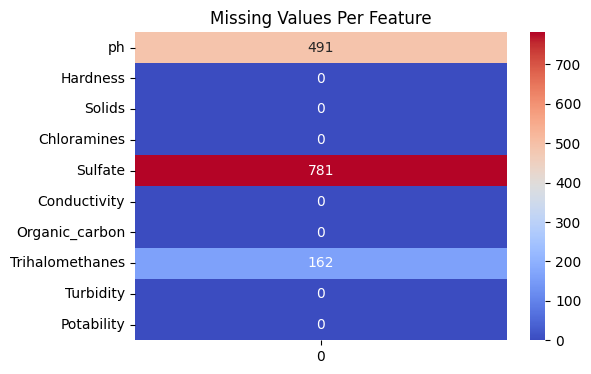

In [41]:
# Heatmap to visualize missing values and their severity in each feature
plt.figure(figsize=(6,4))
sns.heatmap(df.isna().sum().to_frame(), annot=True, fmt='d', cmap='coolwarm')
plt.title("Missing Values Per Feature")
plt.show()

In [42]:
# Displaying the first few rows where the 'Sulfate' feature has missing values
df[df['Sulfate'].isnull()].head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
14,7.496232,205.344982,28388.004887,5.072558,NaN,444.645352,13.228311,70.300213,4.777382,0
16,7.051786,211.049406,30980.600787,10.094796,NaN,315.141267,20.397022,56.651604,4.268429,0


In [43]:
# Displaying the first few rows where the 'ph' feature has missing values
df[df['ph'].isnull()].head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
13,NaN,150.174923,27331.361962,6.838223,299.415781,379.761835,19.370807,76.509996,4.413974,0
20,NaN,227.435048,22305.567414,10.333918,NaN,554.820086,16.331693,45.382815,4.133423,0
22,NaN,215.977859,17107.224226,5.607060,326.943978,436.256194,14.189062,59.855476,5.459251,0


In [44]:
# Retrieving all rows where the 'Trihalomethanes' feature has missing values
df[df['Trihalomethanes'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
62,NaN,229.485694,35729.692709,8.810843,384.943779,296.397547,16.927092,NaN,3.855602,0
81,5.519126,168.728583,12531.601921,7.730723,NaN,443.570372,18.099078,NaN,3.758996,0
110,9.286155,222.661551,12311.268366,7.289866,332.239359,353.740100,14.171763,NaN,5.239982,0
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,NaN,3.149158,0
119,7.812804,196.583886,42550.841816,7.334648,NaN,442.545775,14.666917,NaN,6.204846,0
...,...,...,...,...,...,...,...,...,...,...
3174,6.698154,198.286268,34675.862845,6.263602,360.232834,430.935009,12.176678,NaN,3.758180,1
3185,6.110022,234.800957,16663.539074,5.984536,348.055211,437.892115,10.059523,NaN,2.817780,1
3219,6.417716,209.702425,31974.481631,7.263425,321.382124,289.450118,11.369071,NaN,4.210327,1
3259,9.271355,181.259617,16540.979048,7.022499,309.238865,487.692788,13.228441,NaN,4.333953,1


In [45]:
# Imputing missing values with the mean based on 'Potability'

for col in ['ph', 'Sulfate', 'Trihalomethanes']:
    mean_0 = df[df['Potability'] == 0][col].mean(skipna=True)
    mean_1 = df[df['Potability'] == 1][col].mean(skipna=True)

    df.loc[(df['Potability'] == 0) & (df[col].isna()), col] = mean_0
    df.loc[(df['Potability'] == 1) & (df[col].isna()), col] = mean_1

In [46]:
# Counting the number of missing values in each column
df.isna().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


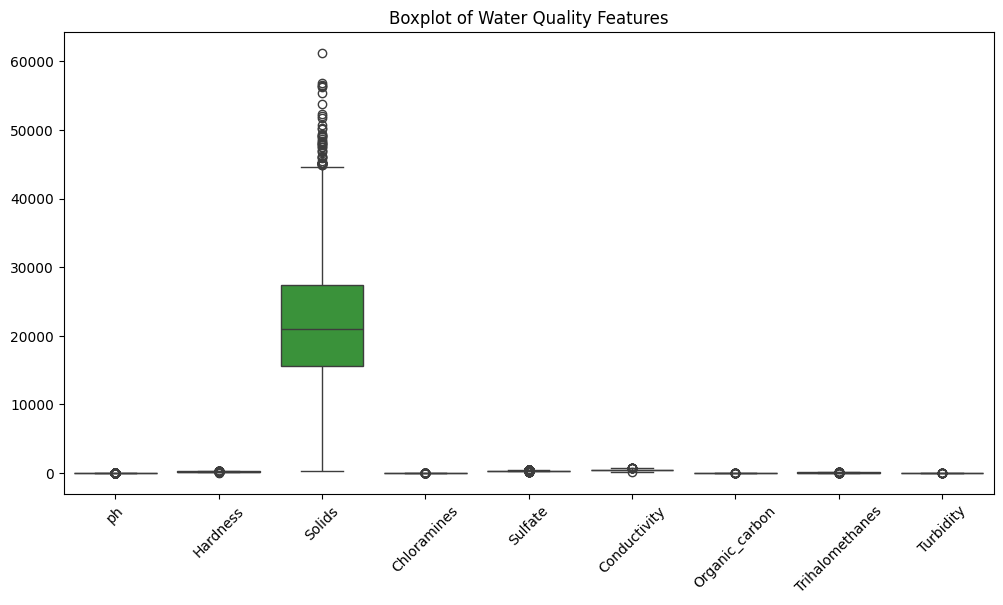

In [47]:
# Boxplot visualization to detect outliers in water quality features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=['Potability']))
plt.xticks(rotation=45)
plt.title("Boxplot of Water Quality Features")
plt.show()

In [48]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Outlier Removal using IQR method on numerical columns only
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out outliers (only checking numerical columns)
outlier_mask = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)
df_cleaned = df[~outlier_mask]

In [49]:
# Print new shape after outlier removal
df_cleaned.shape

(2666, 10)

In [50]:
# Counting the number of missing values in each column after outlier removal
df_cleaned.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


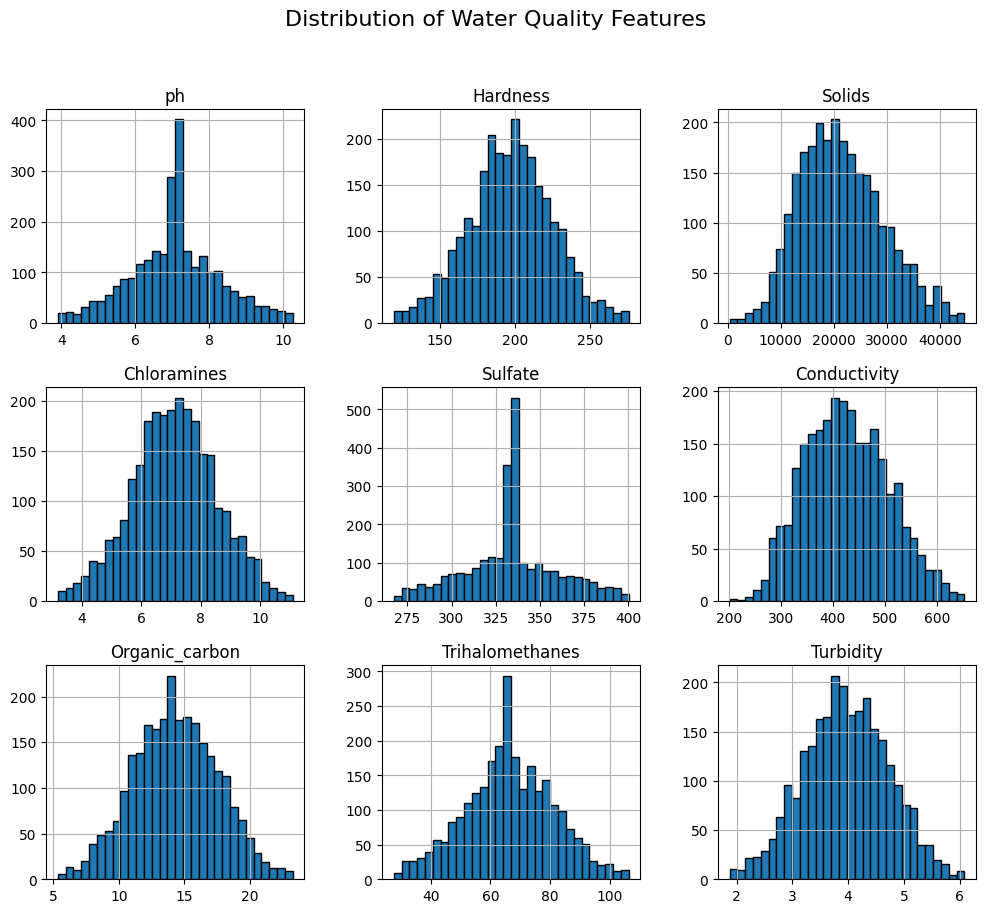

In [51]:
# Visualizing the distribution of water quality features after outlier removal
df_cleaned.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.suptitle("Distribution of Water Quality Features", fontsize=16)
plt.show()

### - Correlation Analysis


Correlation analysis helps us determine relationships between different water quality parameters.

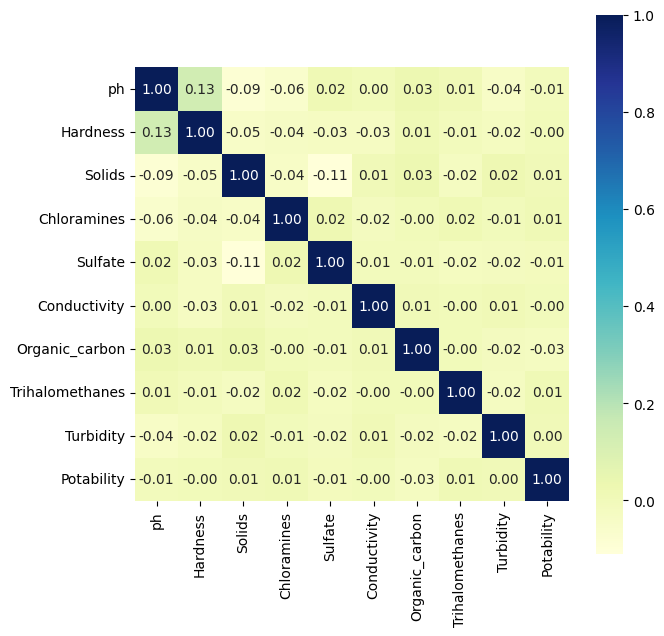

In [52]:
# Heatmap to visualize correlations between water quality features
plt.figure(figsize=(7,7))
sns.heatmap(df_cleaned.corr(), cmap="YlGnBu", square=True, annot=True, fmt='.2f')
plt.show()

In [53]:
# Pie chart to visualize the distribution of potable and non-potable water samples
px.pie(df_cleaned, names="Potability", hole=0.4).show()

##  Data Preprocessing


Before training a model, we preprocess the data by handling missing values and normalizing numerical features.

In [54]:
# Standardizing the dataset and preparing it for modeling
X = df_cleaned.drop(columns=['Potability']) # Selecting features
y = df_cleaned['Potability'] # Target variable

# Splitting data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Applying SMOTE to handle class imbalance by oversampling the minority class
print('Balancing the data using SMOTE (Oversampling Minority Class)\n')

smt = SMOTE(random_state=42)

# Displaying class distribution before applying SMOTE
print('Before SMOTE:', Counter(y_train))

# Applying SMOTE to generate synthetic samples for the minority class
X_train, y_train = smt.fit_resample(X_train, y_train)

# Displaying class distribution after applying SMOTE
print('\nAfter SMOTE:', Counter(y_train))

Balancing the data using SMOTE (Oversampling Minority Class)

Before SMOTE: Counter({0: 1247, 1: 752})

After SMOTE: Counter({1: 1247, 0: 1247})


In [55]:
# Feature Scaling using StandardScaler to normalize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initializing a list to store model accuracy scores
modelAccuracy = []

##  Model Evaluation


After training, we evaluate the model's accuracy and performance using metrics like precision, recall, and F1-score.

In [56]:
# Training and evaluating a Random Forest classifier
print('Random Forest classifier \n')
rf = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42)
rf.fit(X_train, y_train)

# Making predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluating model performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest classifier 

Random Forest Accuracy: 0.7616191904047976
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.77      0.80       424
           1       0.65      0.75      0.70       243

    accuracy                           0.76       667
   macro avg       0.75      0.76      0.75       667
weighted avg       0.77      0.76      0.76       667



In [57]:
# Training and evaluating the XGBoost classifier
print('XGB Classifier\n')
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Making predictions on the test set
y_pred_xgb = xgb.predict(X_test)

# Evaluating model performance
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n",metrics.classification_report(y_test, y_pred_xgb))

XGB Classifier

XGBoost Accuracy: 0.7541229385307346
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80       424
           1       0.64      0.74      0.69       243

    accuracy                           0.75       667
   macro avg       0.74      0.75      0.74       667
weighted avg       0.77      0.75      0.76       667



In [58]:
# Training and evaluating the Logistic Regression model
print('Logistic Regression\n')
lr = LogisticRegression(max_iter=1000, solver='liblinear')
lr.fit(X_train, y_train)

# Making predictions on the test set
y_pred_lr = lr.predict(X_test)

# Evaluating model performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression

Logistic Regression Accuracy: 0.527736131934033
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.54      0.59       424
           1       0.39      0.50      0.44       243

    accuracy                           0.53       667
   macro avg       0.52      0.52      0.52       667
weighted avg       0.56      0.53      0.54       667



In [59]:
# Storing model accuracy scores for visualization
results = {
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "XGBoost": accuracy_score(y_test, y_pred_xgb),
    "Logistic Regression": accuracy_score(y_test, y_pred_lr)
}

<ipython-input-60-157052de055c>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




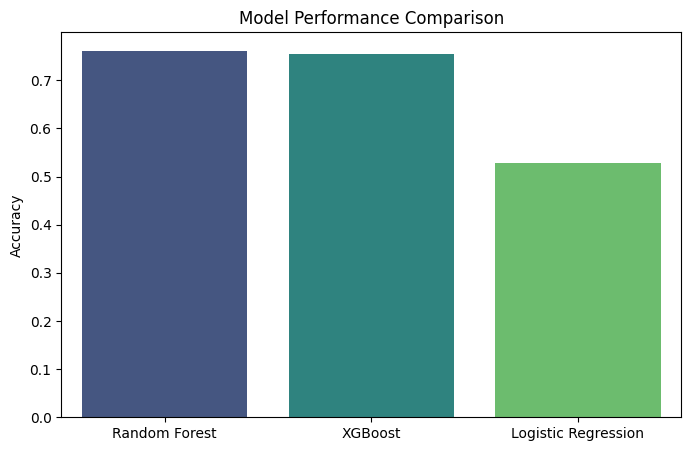

In [60]:
# Bar plot to compare the accuracy of different models
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.show()

In [61]:
# Remove prediction columns if they exist
df_cleaned = df_cleaned.drop(columns=['RF_Prediction', 'XGB_Prediction'], errors='ignore')

# Ensure df_cleaned is properly reset
df_cleaned = df_cleaned.reset_index(drop=True)

# Select only the columns used for training (excluding target variable)
X_full = df_cleaned.drop(columns=['Potability'], errors='ignore')

# Scale using the previously fitted scaler
X_full_scaled = scaler.transform(X_full)

# Predict for entire dataset
df_cleaned['RF_Prediction'] = rf.predict(X_full_scaled)
df_cleaned['XGB_Prediction'] = xgb.predict(X_full_scaled)

# Display updated dataframe
df_cleaned.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,RF_Prediction,XGB_Prediction
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,0,0
1,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0,0,0
2,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,0,0
3,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,0,0
4,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0,0,0


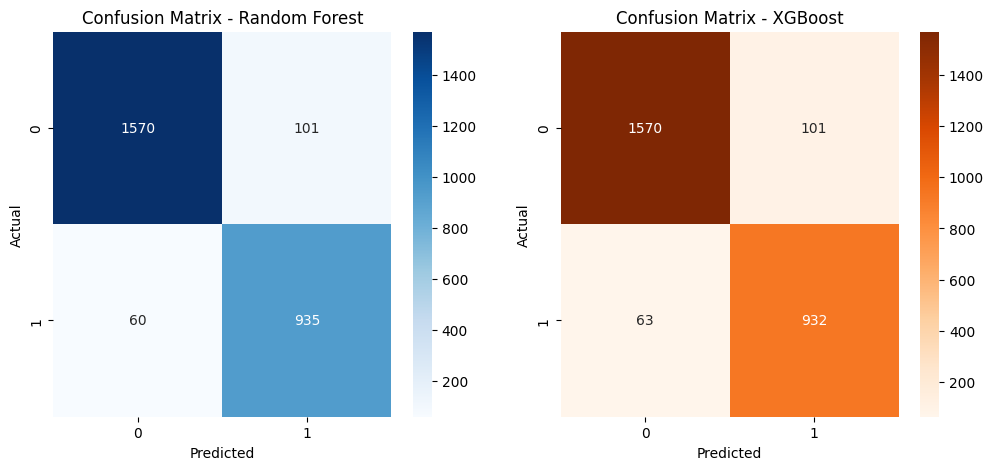

In [62]:
# Visualizing confusion matrices for Random Forest and XGBoost models
rf_cm = confusion_matrix(df_cleaned['Potability'], df_cleaned['RF_Prediction'])
xgb_cm = confusion_matrix(df_cleaned['Potability'], df_cleaned['XGB_Prediction'])

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Confusion matrix for Random Forest
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Confusion Matrix - Random Forest")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

# Confusion matrix for XGBoost
sns.heatmap(xgb_cm, annot=True, fmt="d", cmap="Oranges", ax=ax[1])
ax[1].set_title("Confusion Matrix - XGBoost")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.show()